## BOX OFFICE PREDICTIONS

### TEAM 14 
<br>
DIKSHA BORUAH <BR>
ZHUORAN CHEN 

In [2]:
#import important libararies
import numpy as np 
import pandas as pd 
from collections import Counter
import os
import json
from pandas.io.json import json_normalize
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.imports import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, \
GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from IPython.display import display
from sklearn import metrics

`Note`: In case you want to reproduce our notebook and run into installation error for fastai, you can use the fastai file zipped with the project, and run it on one of of the cells

### READ THE DATASET

In [4]:
train= pd.read_csv('train.csv')

In [5]:
train.shape

(3000, 23)

**The datset consists of 300 rows and 23 columns**

In [6]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

### DATA PRE-PROCESSING AND EDA

Top 20 movies with highest revenue.

In [8]:
# Top 20 revenue movie in the dataset
train.sort_values(by='revenue', ascending=False).head(20)\
[['title','revenue','release_date']]

,title,revenue,release_date
1126,The Avengers,1519557910,4/25/12
1761,Furious 7,1506249360,4/1/15
2770,Avengers: Age of Ultron,1405403694,4/22/15
684,Beauty and the Beast,1262886337,3/16/17
2322,Transformers: Dark of the Moon,1123746996,6/28/11
906,The Dark Knight Rises,1084939099,7/16/12
2135,Pirates of the Caribbean: On Stranger Tides,1045713802,5/14/11
2562,Finding Dory,1028570889,6/16/16
881,Alice in Wonderland,1025491110,3/3/10
734,Zootopia,1023784195,2/11/16


**The Avengers movie released in 2012 has generated the highest revenue amongst all other in the dataset (no doubt about that!)**

In [9]:
#counting NA in datset
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

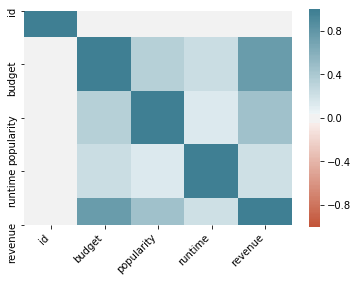

In [10]:
#correlation between features
import seaborn as sns
corr = train.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

**Amongst the numerical features we can see that revenue has the highest correlation with budget among all the other features. The correlation of revenue with budget is higher that the correlation of revenue with movie popularity.**

### SCATTER PLOT SHOWING POSITIVE CORRELATION

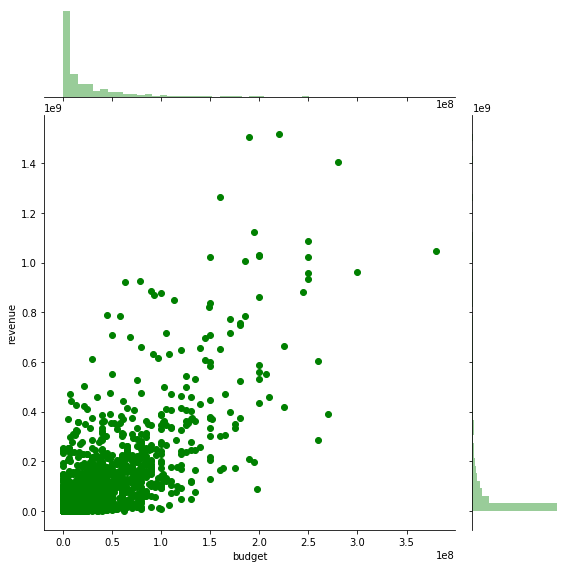

In [11]:
sns.jointplot(x="budget", y="revenue", data=train, height=8, ratio=4, color="g")
plt.show()

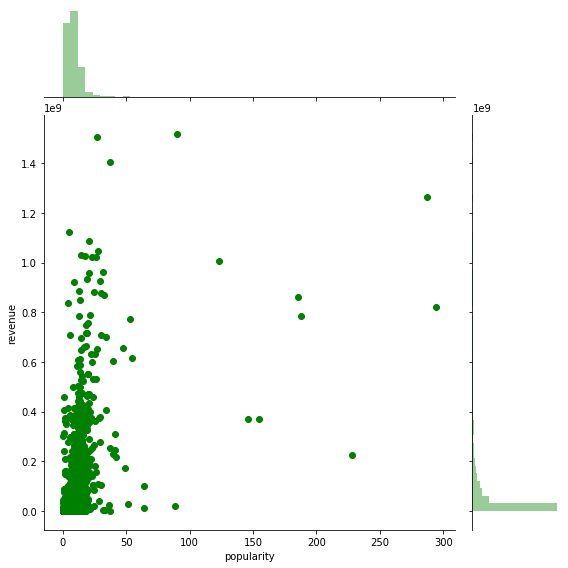

In [12]:
sns.jointplot(x="popularity", y="revenue", data=train, height=8, ratio=4, color="g")
plt.show()

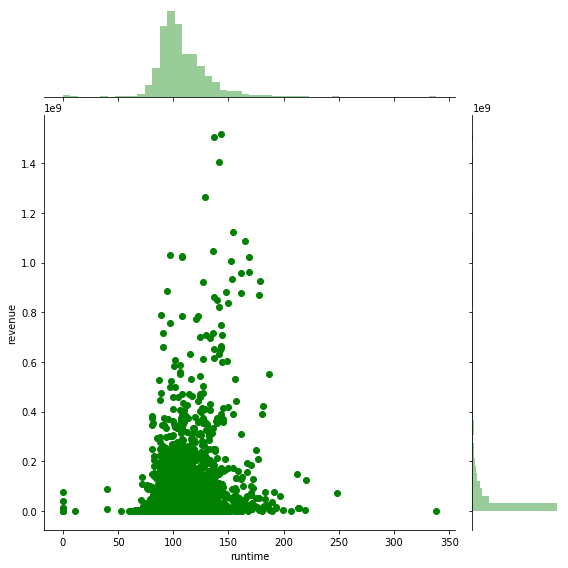

In [13]:
sns.jointplot(x="runtime", y="revenue", data=train, height=8, ratio=4, color="g")
plt.show()

**Budget, popularity and runtime have positive correlation with budget and may be considered important features in later part of the analysis.**

We converst some of the JSOn format columns like collections, genre, cast, crew etc. to format columns to dictionary format

In [14]:
#convert JSON format columns to dictionary format
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    '''This function converts columns with json formatting to dictionary'''
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)

## GENRE


In [15]:
genres = []
for i in range(len(train['genres'])):
    x = train['genres'][i]
    if isinstance(x, list):
        names = [item['name'] for item in x]
        genres.extend(names)

We try to see most movies belong to which genre. **Drama is clearly the most popular genre followed by comedy**

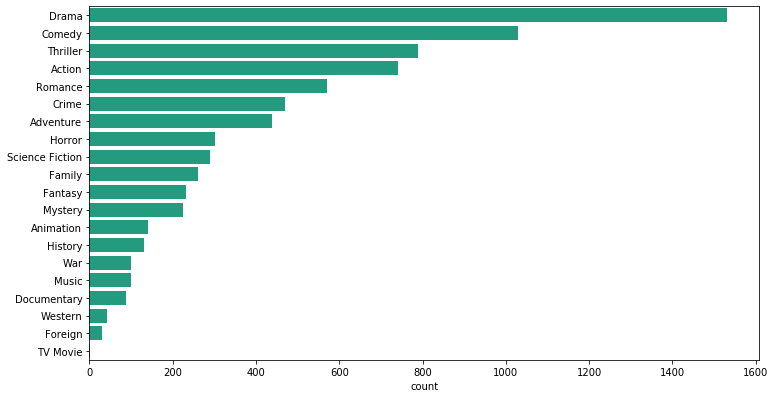

In [16]:
# Numbers of movies by genre
plt.figure(figsize=(12, 6.5))
sns.countplot(y=genres,orient='h',order=pd.Series(genres).value_counts().index,color='#10AF89')

## PRODUCTION COMPANY

We try to see which production companies produce the most movies. Warner Bros, Universal pictures, paramount pictures are some of the top movie production companies

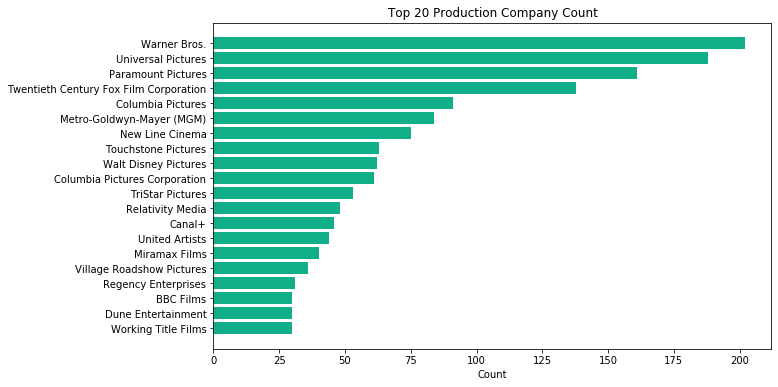

In [17]:
# Counting the frequency of production company 
list_of_companies = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

most_common_companies=Counter([i for j in list_of_companies for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data=dict(most_common_companies)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='#10AF89')
plt.xlabel('Count')
plt.title('Top 20 Production Company Count')
plt.show()

**Now we try to see which production companies produce more revenue. In the future this can be considered as a feature for revenue prediction based on its importance.**

In [18]:
train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train['all_production_companies'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    train['production_company_' + g] = train['all_production_companies'].apply(lambda x: 1 if g in x else 0)


In [19]:
add_datepart(train, 'release_date')

Text(0.5, 0, 'Revenue (100 million dollars)')

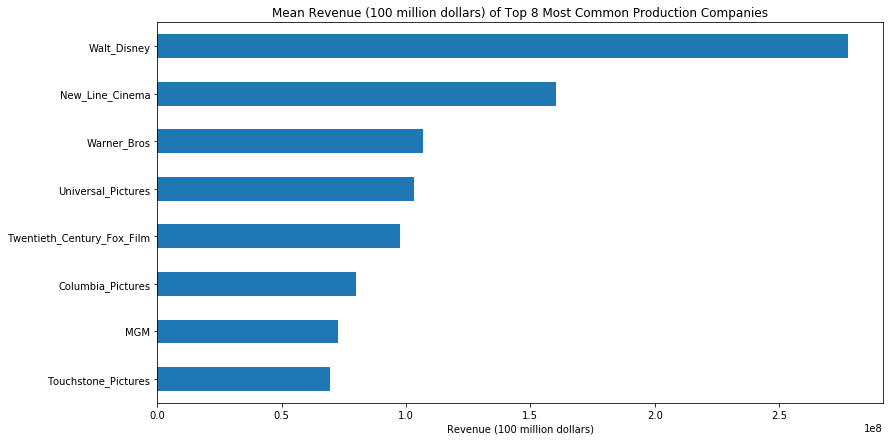

In [20]:
# Getting the mean revenue of top 8 most common production companies 

Warner_Bros=train.loc[train['production_company_Warner Bros.']==1,]
Universal_Pictures=train.loc[train['production_company_Universal Pictures']==1,]
Twentieth_Century_Fox_Film=train.loc[train['production_company_Twentieth Century Fox Film Corporation']==1,]
Columbia_Pictures=train.loc[train['production_company_Columbia Pictures']==1,]
MGM=train.loc[train['production_company_Metro-Goldwyn-Mayer (MGM)']==1,]
New_Line_Cinema=train.loc[train['production_company_New Line Cinema']==1,]
Touchstone_Pictures=train.loc[train['production_company_Touchstone Pictures']==1,]
Walt_Disney=train.loc[train['production_company_Walt Disney Pictures']==1,]

Warner_Bros_revenue=Warner_Bros.groupby(['release_Year']).mean()['revenue']
Universal_Pictures_revenue=Universal_Pictures.groupby(['release_Year']).mean()['revenue']
Twentieth_Century_Fox_Film_revenue=Twentieth_Century_Fox_Film.groupby(['release_Year']).mean()['revenue']
Columbia_Pictures_revenue=Columbia_Pictures.groupby(['release_Year']).mean()['revenue']
MGM_revenue=MGM.groupby(['release_Year']).mean()['revenue']
New_Line_Cinema_revenue=New_Line_Cinema.groupby(['release_Year']).mean()['revenue']
Touchstone_Pictures_revenue=Touchstone_Pictures.groupby(['release_Year']).mean()['revenue']
Walt_Disney_revenue=Walt_Disney.groupby(['release_Year']).mean()['revenue']


prod_revenue_concat = pd.concat([Warner_Bros_revenue,Universal_Pictures_revenue,Twentieth_Century_Fox_Film_revenue,Columbia_Pictures_revenue,
                                MGM_revenue,New_Line_Cinema_revenue,Touchstone_Pictures_revenue,Walt_Disney_revenue], axis=1)
prod_revenue_concat.columns=['Warner_Bros','Universal_Pictures','Twentieth_Century_Fox_Film','Columbia_Pictures','MGM','New_Line_Cinema','Touchstone_Pictures','Walt_Disney']

fig = plt.figure(figsize=(13, 7))
prod_revenue_concat.agg("mean",axis='rows').sort_values(ascending=True).plot(kind='barh',x='Production Companies',y='Revenue',title='Mean Revenue (100 million dollars) of Top 8 Most Common Production Companies')
plt.xlabel('Revenue (100 million dollars)')

**Walt Disney is undoubtedly the most profitable movie production companies, having genrated an average of 250 million US dollars per movie release!**

## PRODUCTION COUNTRIES

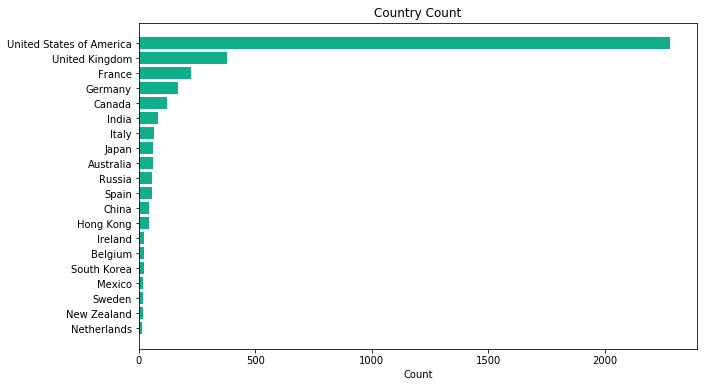

In [21]:
list_of_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_countries=Counter([i for j in list_of_countries for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data=dict(most_common_countries)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='#10AF89')
plt.xlabel('Count')
plt.title('Country Count')
plt.show()

**USA produces the most amount of movies as compared to any other country in the world! The count is not the real count of movies produced each year, on avarage, since the dataset has limited amount of movies.**

## KEYWORDS

In [22]:
# list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
# train['num_cast'] = train['cast'].apply(lambda x: len(x) if x != {} else 0)
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train['all_keyword'] = train['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_keyword = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
for g in top_keyword:
    train['keyword_' + g] = train['all_keyword'].apply(lambda x: 1 if g in x else 0)


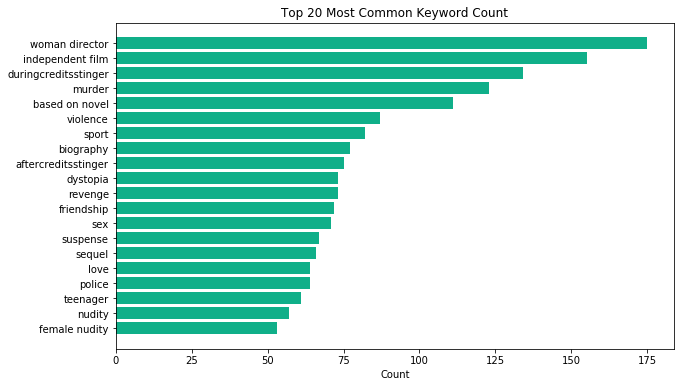

In [23]:
most_common_keywords=Counter([i for j in list_of_keywords for i in j]).most_common(20)
fig = plt.figure(figsize=(10, 6))
data=dict(most_common_keywords)
names = list(data.keys())
values = list(data.values())
plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='#10AF89')
plt.xlabel('Count')
plt.title('Top 20 Most Common Keyword Count')
plt.show()

**Some of the most common keywords used in movies are woman director, murder, based on novel etc. Based on this let us see if some which keywords appear in high revenue genrating movies**

Text(0.5, 0, 'Revenue (100 million dollars)')

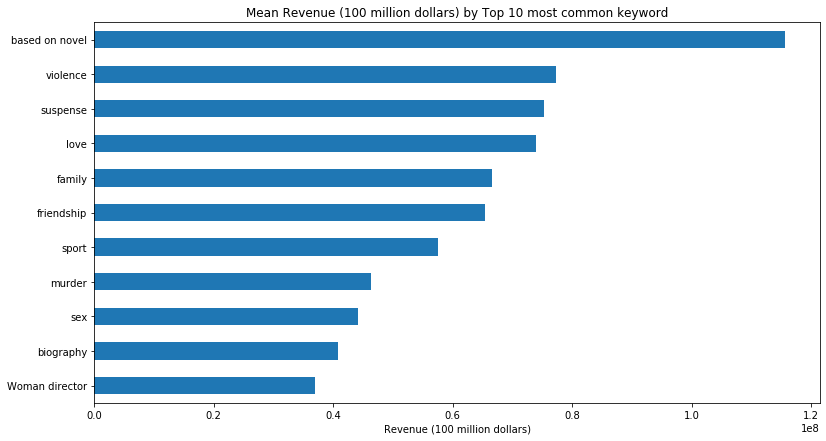

In [24]:
#Mean revenue comparison of 10 most common actor/actress 
keyword_woman_director= train.loc[train['keyword_woman director']==1,]
keyword_murder= train.loc[train['keyword_murder']==1,]
keyword_violence= train.loc[train['keyword_violence']==1,]
keyword_sport= train.loc[train['keyword_sport']==1,]
keyword_love= train.loc[train['keyword_love']==1,]
keyword_sex= train.loc[train['keyword_sex']==1,]
keyword_family= train.loc[train['keyword_family']==1,]
keyword_friendship= train.loc[train['keyword_friendship']==1,]
keyword_suspense= train.loc[train['keyword_suspense']==1,]
keyword_biography=train.loc[train['keyword_biography']==1,]
keyword_based_on_novel=train.loc[train['keyword_based on novel']==1,]

keyword_woman_director_revenue=keyword_woman_director.mean()['revenue']
keyword_murder_revenue=keyword_murder.mean()['revenue']
keyword_violence_revenue=keyword_violence.mean()['revenue']
keyword_sport_revenue=keyword_sport.mean()['revenue']
keyword_love_revenue=keyword_love.mean()['revenue']
keyword_family_revenue=keyword_family.mean()['revenue']
keyword_sex_revenue=keyword_sex.mean()['revenue']
keyword_friendship_revenue=keyword_friendship.mean()['revenue']
keyword_suspense_revenue=keyword_suspense.mean()['revenue']
keyword_biography_revenue=keyword_biography.mean()['revenue']
keyword_based_on_novel_revenue=keyword_based_on_novel.mean()['revenue']


keyword_revenue_concat = pd.Series([keyword_woman_director_revenue,keyword_murder_revenue,keyword_violence_revenue,\
                                   keyword_sport_revenue,keyword_love_revenue,keyword_family_revenue,keyword_sex_revenue,\
                                   keyword_friendship_revenue,keyword_suspense_revenue,keyword_biography_revenue,\
                                   keyword_based_on_novel_revenue])
keyword_revenue_concat.index=['Woman director','murder','violence','sport','love','family','sex','friendship','suspense',\
                             'biography','based on novel']


fig = plt.figure(figsize=(13, 7))
keyword_revenue_concat.sort_values(ascending=True).plot(kind='barh',title='Mean Revenue (100 million dollars) by Top 10 most common keyword')
plt.xlabel('Revenue (100 million dollars)')

**Based on novel, violence, suspense , love are some of the keywords in high revenue generating movies. The usage of keywords 'based on novel' seems really catchy and makes sense why it leads to higher box office. Also even if woman director is the most common keyword in the movie dataset, the revenues of movie generated is lesser with usage of this keywords as compared to others**

## CAST

Next we try to find out the popular actors in movies. This maybe an important feature because we normally associate good acotors with good movies and hence expext it to generate higher revenue.

In [25]:
# actors with most appearance
# df_credit['cast'] = df_credit['cast'].apply(literal_eval)
actors = []
for i in range(len(train['cast'])):
    x = train['cast'][i]
    if isinstance(x, list):
        names = [item['name'] for item in x]
        actors.extend(names)

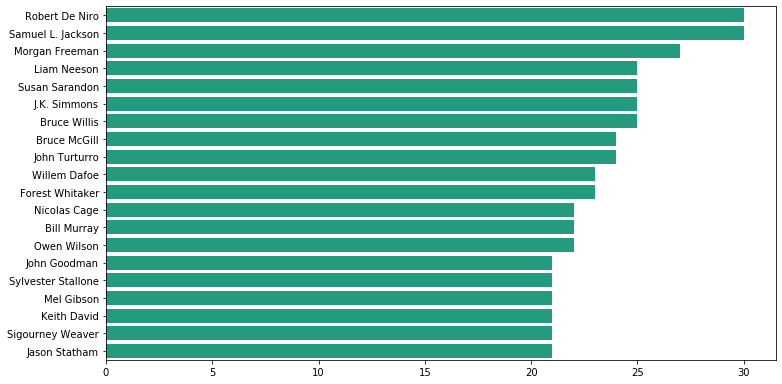

In [26]:
plt.figure(figsize=(12, 6.5))
top20_actors = pd.Series(actors).value_counts()[:20]
sns.barplot(x=top20_actors.values,y=top20_actors.index,orient='h',color='#10AF89')

**Samuel Jackson, Robert De Niro, Morgan Freeman are some of the most popular actors amonst others. It would be interesting to see which actor generates highest revenue**

In [27]:
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train['num_cast'] = train['cast'].apply(lambda x: len(x) if x != {} else 0)
train['all_cast'] = train['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(30)]
for g in top_cast_names:
    train['cast_name_' + g] = train['all_cast'].apply(lambda x: 1 if g in x else 0)


Text(0.5, 0, 'Revenue (100 million dollars)')

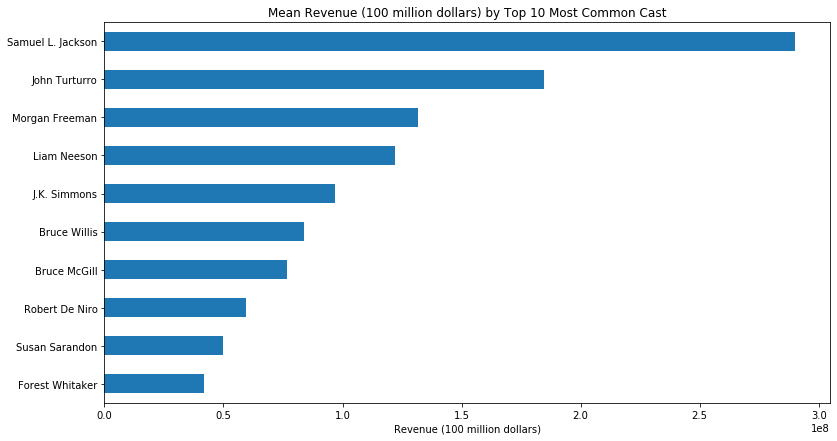

In [28]:
#Mean revenue comparison of 10 most common actor/actress 
cast_name_Samuel_L_Jackson=train.loc[train['cast_name_Samuel L. Jackson']==1,]
cast_name_Robert_De_Niro=train.loc[train['cast_name_Robert De Niro']==1,]
cast_name_Morgan_Freeman=train.loc[train['cast_name_Morgan Freeman']==1,]
cast_name_J_K_Simmons=train.loc[train['cast_name_J.K. Simmons']==1,]
cast_name_Bruce_Willis=train.loc[train['cast_name_Bruce Willis']==1,]
cast_name_Liam_Neeson=train.loc[train['cast_name_Liam Neeson']==1,]
cast_name_Susan_Sarandon=train.loc[train['cast_name_Susan Sarandon']==1,]
cast_name_Bruce_McGill=train.loc[train['cast_name_Bruce McGill']==1,]
cast_name_John_Turturro=train.loc[train['cast_name_John Turturro']==1,]
cast_name_Forest_Whitaker=train.loc[train['cast_name_Forest Whitaker']==1,]


cast_name_Samuel_L_Jackson_revenue=cast_name_Samuel_L_Jackson.mean()['revenue']
cast_name_Robert_De_Niro_revenue=cast_name_Robert_De_Niro.mean()['revenue']
cast_name_Morgan_Freeman_revenue=cast_name_Morgan_Freeman.mean()['revenue']
cast_name_J_K_Simmons_revenue=cast_name_J_K_Simmons.mean()['revenue']
cast_name_Bruce_Willis_revenue=cast_name_Bruce_Willis.mean()['revenue']
cast_name_Liam_Neeson_revenue=cast_name_Liam_Neeson.mean()['revenue']
cast_name_Susan_Sarandon_revenue=cast_name_Susan_Sarandon.mean()['revenue']
cast_name_Bruce_McGill_revenue=cast_name_Bruce_McGill.mean()['revenue']
cast_name_John_Turturro_revenue=cast_name_John_Turturro.mean()['revenue']
cast_name_Forest_Whitaker_revenue=cast_name_Forest_Whitaker.mean()['revenue']


cast_revenue_concat = pd.Series([cast_name_Samuel_L_Jackson_revenue,cast_name_Robert_De_Niro_revenue,cast_name_Morgan_Freeman_revenue,cast_name_J_K_Simmons_revenue,
                                cast_name_Bruce_Willis_revenue,cast_name_Liam_Neeson_revenue,cast_name_Susan_Sarandon_revenue,cast_name_Bruce_McGill_revenue,
                                cast_name_John_Turturro_revenue,cast_name_Forest_Whitaker_revenue])
cast_revenue_concat.index=['Samuel L. Jackson','Robert De Niro','Morgan Freeman','J.K. Simmons','Bruce Willis','Liam Neeson','Susan Sarandon','Bruce McGill',
                            'John Turturro','Forest Whitaker']


fig = plt.figure(figsize=(13, 7))
cast_revenue_concat.sort_values(ascending=True).plot(kind='barh',title='Mean Revenue (100 million dollars) by Top 10 Most Common Cast')
plt.xlabel('Revenue (100 million dollars)')

**Samuel Jackson genrates the most revenue compared to his co actors. This may be the reason why he is cast in more number of movies as compared to others.**

### CREW

Next, we try to see the relation of revenue with crew members. The crew members can be director, producer, writer, editor, casting director amongst other fields of film making

In [29]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)
train['all_crew'] = train['crew'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(50)]
for g in top_crew_names:
    train['crew_name_' + g] = train['all_crew'].apply(lambda x: 1 if g in x else 0)


Text(0.5, 0, 'Revenue (100 million dollars)')

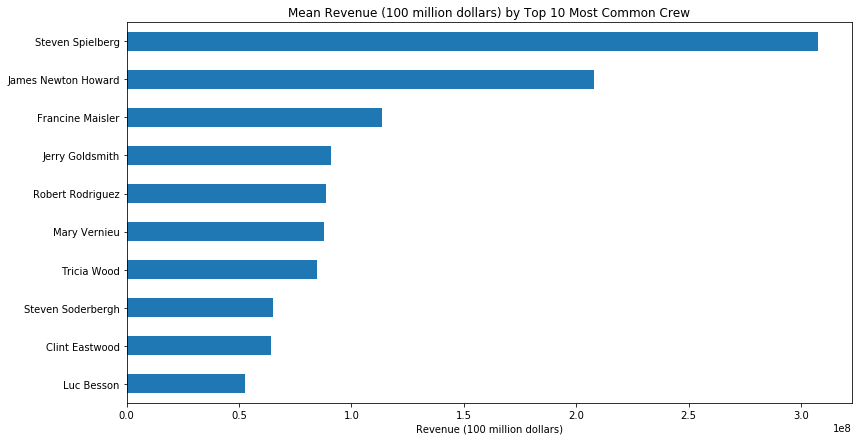

In [30]:
crew_name_Clint_Eastwood=train.loc[train['crew_name_Clint Eastwood']==1,]
crew_name_Robert_Rodriguez=train.loc[train['crew_name_Robert Rodriguez']==1,]
crew_name_Steven_Soderbergh=train.loc[train['crew_name_Steven Soderbergh']==1,]
crew_name_James_Newton_Howard=train.loc[train['crew_name_James Newton Howard']==1,]
crew_name_Mary_Vernieu=train.loc[train['crew_name_Mary Vernieu']==1,]
crew_name_Steven_Spielberg=train.loc[train['crew_name_Steven Spielberg']==1,]
crew_name_Luc_Besson=train.loc[train['crew_name_Luc Besson']==1,]
crew_name_Jerry_Goldsmith=train.loc[train['crew_name_Jerry Goldsmith']==1,]
crew_name_Francine_Maisler=train.loc[train['crew_name_Francine Maisler']==1,]
crew_name_Tricia_Wood=train.loc[train['crew_name_Tricia Wood']==1,]


crew_name_Clint_Eastwood_revenue=crew_name_Clint_Eastwood.mean()['revenue']
crew_name_Robert_Rodriguez_revenue=crew_name_Robert_Rodriguez.mean()['revenue']
crew_name_Steven_Soderbergh_revenue=crew_name_Steven_Soderbergh.mean()['revenue']
crew_name_James_Newton_Howard_revenue=crew_name_James_Newton_Howard.mean()['revenue']
crew_name_Mary_Vernieu_revenue=crew_name_Mary_Vernieu.mean()['revenue']
crew_name_Steven_Spielberg_revenue=crew_name_Steven_Spielberg.mean()['revenue']
crew_name_Luc_Besson_revenue=crew_name_Luc_Besson.mean()['revenue']
crew_name_Jerry_Goldsmith_revenue=crew_name_Jerry_Goldsmith.mean()['revenue']
crew_name_Francine_Maisler_revenue=crew_name_Francine_Maisler.mean()['revenue']
crew_name_Tricia_Wood_revenue=crew_name_Tricia_Wood.mean()['revenue']

crew_revenue_concat = pd.Series([crew_name_Clint_Eastwood_revenue,crew_name_Robert_Rodriguez_revenue,crew_name_Steven_Soderbergh_revenue,crew_name_James_Newton_Howard_revenue,
                                crew_name_Mary_Vernieu_revenue,crew_name_Steven_Spielberg_revenue,crew_name_Luc_Besson_revenue,crew_name_Jerry_Goldsmith_revenue,
                                crew_name_Francine_Maisler_revenue,crew_name_Tricia_Wood_revenue])
crew_revenue_concat.index=['Clint Eastwood','Robert Rodriguez','Steven Soderbergh','James Newton Howard','Mary Vernieu','Steven Spielberg','Luc Besson','Jerry Goldsmith',
                            'Francine Maisler','Tricia Wood']


fig = plt.figure(figsize=(13, 7))
crew_revenue_concat.sort_values(ascending=True).plot(kind='barh',title='Mean Revenue (100 million dollars) by Top 10 Most Common Crew')
plt.xlabel('Revenue (100 million dollars)')

**Steven Spielberg is clearly the most money making director, having directed famous films like Jurassic Park, Jaws etc. He generates nearly 300M US Dollars on an average per movie. James Newton Howard, a very famous American music composer, having composed music for movies like The Dark Knight, Kin Kong has composed music for highly profitable movies**

## HOMEPAGE

Text(0.5, 1, 'Revenue of movies with and without homepage')

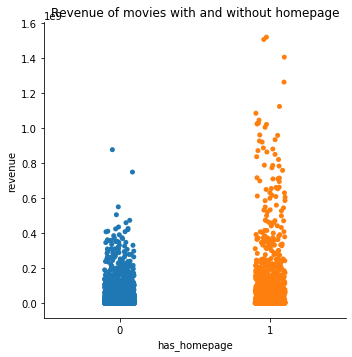

In [31]:
train['has_homepage'] = 1
train.loc[pd.isnull(train['homepage']) ,"has_homepage"] = 0
sns.catplot(x="has_homepage", y="revenue", data=train)
plt.title('Revenue of movies with and without homepage')

**It can be seen that movies with homepage have generated higher revenue as compared to the one without homepage. Some examples of movies with homepage are Whiplash, American beauty, Ice Age**

## TAGLINE

Text(0.5, 1, 'Revenue of movies with and without a tagline')

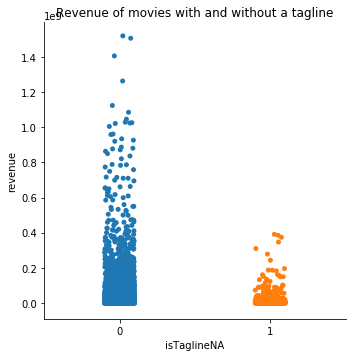

In [32]:
train['isTaglineNA'] = 0
train.loc[pd.isnull(train['tagline']) ,"isTaglineNA"] = 1
sns.catplot(x="isTaglineNA", y="revenue", data=train)
plt.title('Revenue of movies with and without a tagline')

**The plot above shows that movies with tagline generate more revenue than those without tagline. One of the most famous tagline is from the movie Alien that went Alien: "In space no one can hear you scream"**

## SINGLE/ MULTIPLE TITLE

Text(0.5, 1, 'Revenue of movies with single and multiple titles')

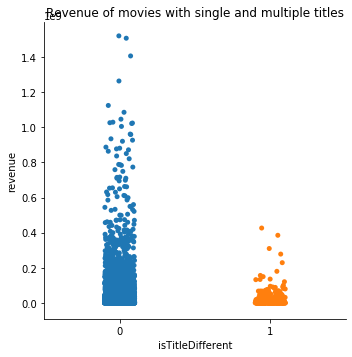

In [33]:
train['isTitleDifferent'] = 1
train.loc[ train['original_title'] == train['title'] ,"isTitleDifferent"] = 0 
sns.catplot(x="isTitleDifferent", y="revenue", data=train)
plt.title('Revenue of movies with single and multiple titles')

**This mostly represents the movies that have a non-english title as original title and has been converted to an english title. These movies are less in number and also generate lesser revenue**

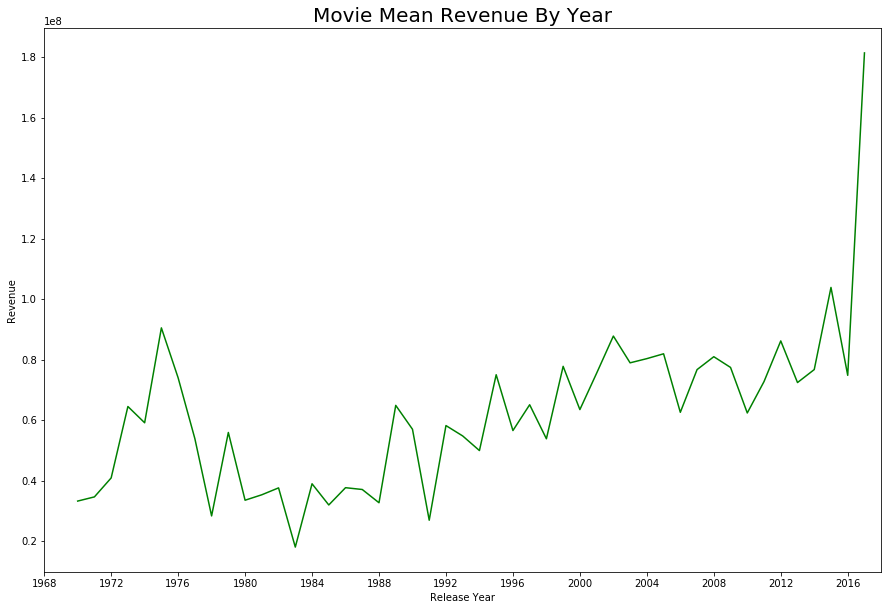

In [34]:
train['meanRevenueByYear'] = train.groupby("release_Year")["revenue"].aggregate('mean')
train['meanRevenueByYear'][1968:2019].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1968,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year",fontsize=20)
plt.show()

**Movie reveue curve by year is not a smooth curve, different trends are shown in different years. Some of the interesting trends are decline in movie revenue from 1975 to 1978 and steady increase in movie revenue after 2016**

### FEATURE ENGINEERING

Convert revenue to log

In [35]:
train=pd.read_csv('train.csv')

Skew of revenue attribute: 4.5


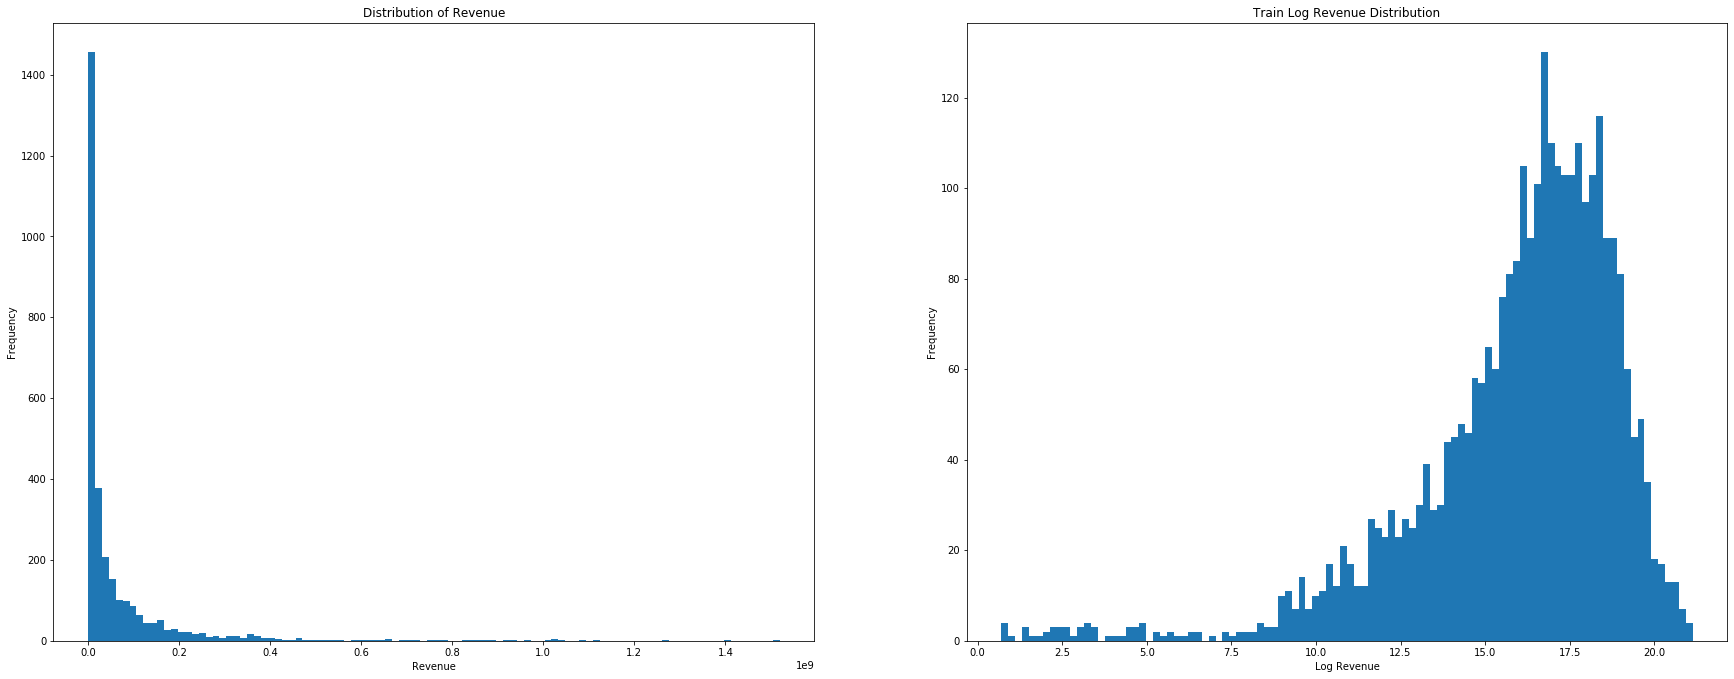

In [36]:
# Plot the distribution of the revenue
from scipy.stats import skew, boxcox
fig = plt.figure(figsize=(30, 25))

plt.subplot(221)
train['revenue'].plot(kind='hist',bins=100)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')

plt.subplot(222)
np.log1p(train['revenue']).plot(kind='hist',bins=100)
plt.title('Train Log Revenue Distribution')
plt.xlabel('Log Revenue')

print('Skew of revenue attribute: %0.1f' % skew(train['revenue']))

In [37]:
train['revenue']=np.log1p(train['revenue'])

In [38]:
add_datepart(train, 'release_date')#this function is a fast_ai function that converts release_date to different date features

In [39]:
mlb=MultiLabelBinarizer() #for one-hot encoding

We'll use some fields that seem important at the moment, like genres, production companies, keywords, cast, crew ets

### GENRE

In [40]:
train['genres']

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
                              ...                        
2995    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2996    [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...
2997    [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...
2998    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2999    [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...
Name: genres, Length: 3000, dtype: object

In [41]:
def convertStringToList(strVal):
    '''This function converts string format to list using literal_eval'''
    if type(strVal) is not str:
        return  []
    else:
        return ast.literal_eval(strVal)

In [42]:
def formatDictColumnAndExtractNames(strVal):
    '''This function extracts key- name from columns'''
    listOfItems = convertStringToList(strVal)
    return list(map(lambda x: x['name'], listOfItems))

In [43]:
def extractGenres(df):
    '''This function extracts some of the top genres as features'''
    df['genres'] = df['genres'].apply(formatDictColumnAndExtractNames)

    return df.join(pd.DataFrame(mlb.fit_transform(df.pop('genres')),
                          columns=list(map(lambda x: 'genre_'+x,mlb.classes_)),
                          index=df.index))

In [44]:
train=extractGenres(train)

### Production company

In [45]:
def extractCommonProdCompanies(df):
    '''This function extracts the production companies appearing more than 30 times'''
    
    df['production_companies'] = df['production_companies'].apply(formatDictColumnAndExtractNames)

    companiesCount = df['production_companies'].apply(pd.Series).stack().value_counts()
    companiesToKeep = companiesCount[companiesCount > 30].keys()
    print(companiesToKeep)

    df['production_companies'] = df['production_companies'].apply(lambda x: list(filter(lambda i: i in companiesToKeep, x)))

    return df.join(pd.DataFrame(mlb.fit_transform(df.pop('production_companies')),
                          columns=list(map(lambda x: 'prod_company_'+x,mlb.classes_)),
                          index=df.index))

In [46]:
train = extractCommonProdCompanies(train)

Index(['Warner Bros.', 'Universal Pictures', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema', 'Touchstone Pictures',
       'Walt Disney Pictures', 'Columbia Pictures Corporation',
       'TriStar Pictures', 'Relativity Media', 'Canal+', 'United Artists',
       'Miramax Films', 'Village Roadshow Pictures', 'Regency Enterprises'],
      dtype='object')


In [47]:
train_cats(train)#fast_ai function to convert strings to pandas categories

In [48]:
df_trn, y_trn, nas = proc_df(train, 'revenue')
#proc_df is a fast_ai functiom that takes a data frame  and splits off the 
#response variable, and changes the df into an entirely numeric dataframe.
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_trn, y_trn)
m.score(df_trn,y_trn)
def split_vals(a,n): 
    return a[:n], a[n:]

n_valid = 600 # 20%
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(train, n_trn)

def rmse(x,y): 
    '''This function calculates the root mean square error'''
    return math.sqrt(((x-y)**2).mean())


def print_score(m):
    '''
    print_score function depending on the evaluation metric: rmse
    '''
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
    
    
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=10, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)
fi = rf_feat_importance(m, df_trn)
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
x=X_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.head()

[1.751128904838466, 1.971933621812346, 0.6832766980343776, 0.5195503166009589, 0.4945206114213556]


,id,belongs_to_collection,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,prod_company_TriStar Pictures,prod_company_Twentieth Century Fox Film Corporation,prod_company_United Artists,prod_company_Universal Pictures,prod_company_Village Roadshow Pictures,prod_company_Walt Disney Pictures,prod_company_Warner Bros.,runtime_na,pred_std,pred
2400,2401,0,0,0,1232,8,931,131,9.916094,1839,...,0,0,0,0,0,0,0,False,1.486596,15.866147
2401,2402,0,60000000,0,821,8,1131,901,6.710215,974,...,0,0,0,1,0,0,0,False,0.927080,17.871926
2402,2403,0,60000000,0,1470,8,1958,1736,10.776138,2123,...,0,0,0,0,0,0,1,False,0.518111,18.082344
2403,2404,0,47000000,0,614,8,2104,702,5.507082,247,...,0,0,0,0,0,0,1,False,0.813058,17.034658
2404,2405,0,37000000,192,1925,8,2510,1190,13.081203,2953,...,0,0,0,0,0,0,1,False,0.516385,18.172163


In [49]:
new_dt=dict()
T1=[]
T2=[]
for i in range(2420):
    if i>=2400:
        T1.append(train.loc[i,'revenue'])
        T2.append(x.loc[i,'pred'])
new_dt['actual']=T1
new_dt['predicted']=T2    
pd.DataFrame(new_dt)

,actual,predicted
0,13.442287,15.866147
1,17.426428,17.871926
2,18.952889,18.082344
3,16.568610,17.034658
4,18.852633,18.172163
5,8.007700,14.614144
6,17.990616,15.678393
7,14.449340,13.554256
8,15.299233,16.091376
9,17.703546,17.774619


In [50]:
def addCastLengthColumn(df):
    castNames = df['cast'].apply(formatDictColumnAndExtractNames)
    df['cast_len'] = castNames.apply(lambda x: len(x))
    return df

Adding some more features related to spoken language, keywords etc can lead to  better score predictions

### Budget

In [51]:
train['has_budget'] = train['budget'].apply(lambda x: x > 0)

In [52]:
#remove biased or unusable features
toRemove = ['imdb_id', 'id', 'poster_path', 'overview', 'homepage', 'tagline', 'original_title', 'status']
train.drop(toRemove, axis=1, inplace=True)

In [53]:
train.columns

Index(['belongs_to_collection', 'budget', 'original_language', 'popularity',
       'production_countries', 'runtime', 'spoken_languages', 'title',
       'Keywords', 'cast', 'crew', 'revenue', 'release_Year', 'release_Month',
       'release_Week', 'release_Day', 'release_Dayofweek', 'release_Dayofyear',
       'release_Is_month_end', 'release_Is_month_start',
       'release_Is_quarter_end', 'release_Is_quarter_start',
       'release_Is_year_end', 'release_Is_year_start', 'release_Elapsed',
       'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family',
       'genre_Fantasy', 'genre_Foreign', 'genre_History', 'genre_Horror',
       'genre_Music', 'genre_Mystery', 'genre_Romance',
       'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller',
       'genre_War', 'genre_Western', 'prod_company_Canal+',
       'prod_company_Columbia Pictures',
       'prod_company_Columbia Pictures Corporation'

In [54]:
train_cats(train)

Apply proc_df: proc_df takes a data frame df and splits off the response variable, and changes the df into an entirely numeric dataframe.
Check the initial score on all the dataframe
Split vals into training set and validation set

In [55]:
df_trn, y_trn, nas = proc_df(train, 'revenue')

In [56]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_trn, y_trn)
m.score(df_trn,y_trn)

0.9325015335301429

In [57]:
def split_vals(a,n): 
    return a[:n], a[n:]
n_valid = 600 # 20%
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(train, n_trn)

In [58]:
# for gradient boost
X_train_gb = X_train.copy()
X_valid_gb = X_valid.copy()

### Random forest (feature importance)

In [59]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

# print_score function depending on the evaluation metric: rmse
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [60]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=10, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.7587140305828148, 1.9565098948532587, 0.6805269414532096, 0.5270367190426932, 0.5053539350577596]


**RMSE of the validation data (test data) is 1.97 with a model accuracy of 0.51 whereas the accuracy of the training model is 0.66. The RMSE of test data is comparable to train data and is not that high**

In [61]:
fi = rf_feat_importance(m, df_trn)
fi

,cols,imp
1,budget,0.371592
3,popularity,0.223391
61,has_budget,0.068898
23,release_Elapsed,0.050182
10,crew,0.038609
...,...,...
22,release_Is_year_start,0.000000
36,genre_Music,0.000000
26,genre_Animation,0.000000
33,genre_Foreign,0.000000


In [62]:
#plot feature importance
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,12), legend=False)

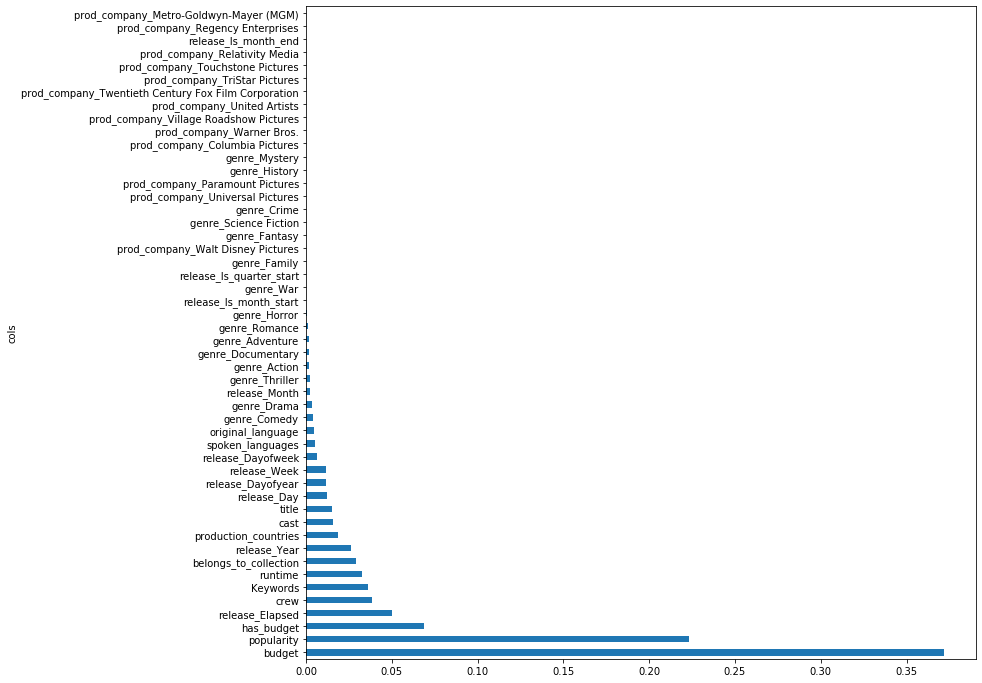

In [63]:
# plot the top 50 features
plot_fi(fi[:50]);

**Budget, popularity, release_elapsed, crew, runtime, keywords have been identified as some of the important features by this model**

We'll keep only the top 25-30 features

In [64]:
#keep the top 25-30 features
to_keep = fi[fi.imp>0.002].cols; len(to_keep)

22

In [65]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [66]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=10, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.7630653541778438, 1.9713964215295339, 0.678944136824583, 0.519812052135112, 0.5070445479336689]


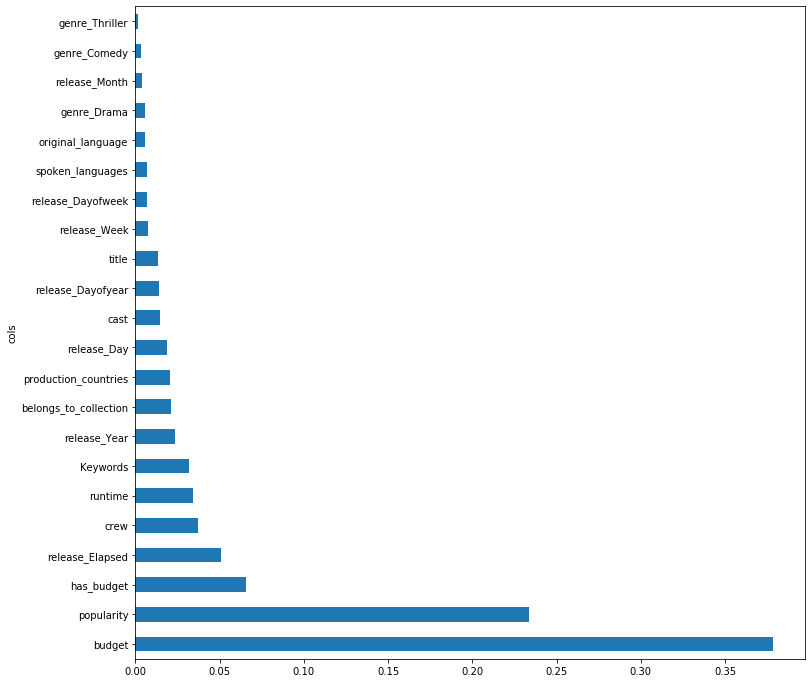

In [67]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [68]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

In [69]:
x=X_valid.copy()

In [70]:
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)

In [71]:
x.head()

,budget,popularity,has_budget,release_Elapsed,crew,Keywords,runtime,belongs_to_collection,release_Year,production_countries,...,release_Week,release_Dayofweek,spoken_languages,original_language,genre_Comedy,genre_Drama,release_Month,genre_Thriller,pred_std,pred
2400,0,9.916094,False,948758400,668,56,110.0,0,2000,317,...,4,1,263,8,1,0,1,0,1.581281,15.946011
2401,60000000,6.710215,True,785462400,688,16,109.0,0,1994,317,...,47,1,263,8,1,0,11,0,0.839154,17.761117
2402,60000000,10.776138,True,1078444800,2418,467,101.0,0,2004,317,...,10,4,211,8,1,0,3,0,0.657205,17.997634
2403,47000000,5.507082,True,661737600,1055,1890,125.0,0,1990,317,...,51,4,263,8,1,1,12,0,0.783190,16.969280
2404,37000000,13.081203,True,1284508800,734,2367,125.0,0,2010,317,...,37,2,263,8,0,1,9,1,0.537918,18.173070


In [72]:
new_dt=dict()
T1=[]
T2=[]
for i in range(2420):
    if i>=2400:
        T1.append(train.loc[i,'revenue'])
        T2.append(x.loc[i,'pred'])
new_dt['actual']=T1
new_dt['predicted']=T2    
pd.DataFrame(new_dt)

,actual,predicted
0,13.442287,15.946011
1,17.426428,17.761117
2,18.952889,17.997634
3,16.568610,16.969280
4,18.852633,18.173070
5,8.007700,14.913802
6,17.990616,15.741974
7,14.449340,13.763116
8,15.299233,16.403330
9,17.703546,17.990629


**The above table is shown in order to visually compare the actual revenue from the predicted revenue (both represented in log). As can be seen the values are nearly comparable.**

### Gradient Boost

In [73]:
X_train = X_train_gb
X_valid = X_valid_gb

In [74]:
gbm = GradientBoostingRegressor(n_estimators=40, min_samples_leaf=10)
gbm.fit(X_train, y_train)
print_score(gbm)

[1.9662375245880628, 1.981821825168713, 0.6006848908003384, 0.5147198340195265]


**THE RMSE of both the training and test data are comparable. The accuracy score of validation data is 0.51 which is similar to the performance of the random forest model**

fi = rf_feat_importance(gbm, df_trn)
fi

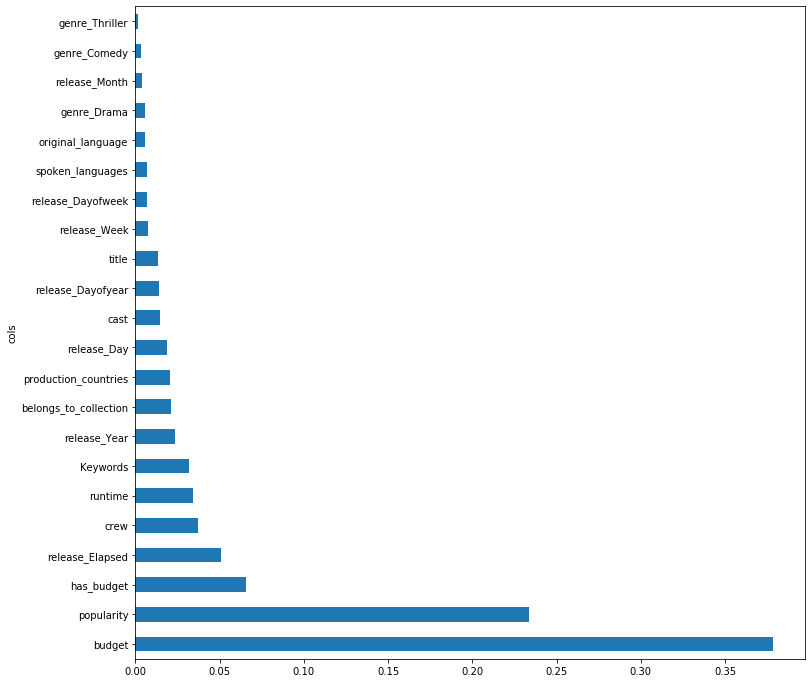

In [75]:
# plot the top 50 features
plot_fi(fi[:50]);

In [76]:
#keep the top 25-30 features
to_keep = fi[fi.imp>0.002].cols; len(to_keep)

21

In [77]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [78]:
gbm = GradientBoostingRegressor(n_estimators=40, min_samples_leaf=10)
gbm.fit(X_train, y_train)
print_score(gbm)

[1.9727937655743413, 1.9793863328469758, 0.5980174909519479, 0.5159118381418741]


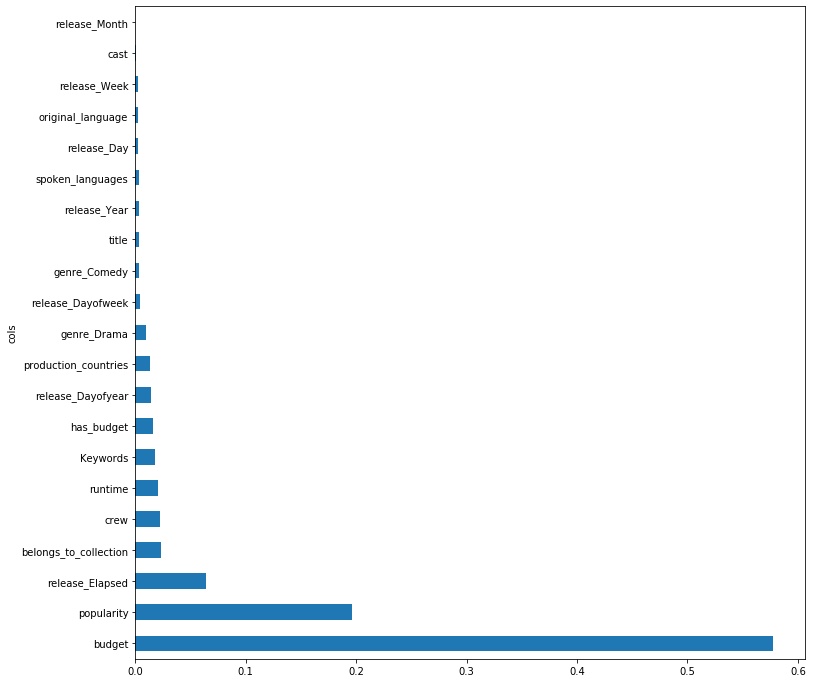

In [79]:
fi = rf_feat_importance(gbm, df_keep)
plot_fi(fi);

### ADABOOST

In [80]:
X_train = X_train_gb
X_valid = X_valid_gb

In [81]:
adam = AdaBoostRegressor(n_estimators=40)
adam.fit(X_train, y_train)
print_score(adam)

[2.5558881227492085, 2.622071147170611, 0.3252739736369873, 0.1505217355133177]


The model accruracy for adaboost is very low- 0.15 and hence we won't proceed further with this model

**Thus, in conclusion, movie budget, popularity, release_elapsed, belongs to collection (eg: James bond collection, avengers collection etc), runtime etc are important factors in predicting movie revenue. It's not suprprising to see that budget has the highest importance,the more money one puts into a movie the return is also expected to be higher. Also the crew of the movie seems to be more important than the movie cast which is pretty interesting because normally we like to associate the success of a movie with an actor/ actress.**